In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('mPos_0706_資料更新_742.xlsx')

In [3]:
data.head(5)

policy sickName questionnaire_EBAO     sick_id_EBAO  \
0  70000313460       痔瘡                NaN          9990000   
1  70000313650      青光眼                NaN          9990000   
2  70000313701      甲狀腺            甲狀腺疾病問卷  9990000,O040001   
3  70000313702      甲狀腺            甲狀腺疾病問卷  O040001,9990000   
4  70000313880       白斑                NaN              NaN   

  sickName_judge_EDW sick_ID_EDW questionnaire_EDW  flag_EDW  Unnamed: 8  \
0                 痔瘡     9040006             0-無問卷       1.0         NaN   
1                青光眼     E010001             0-無問卷       1.0         NaN   
2               專有名詞      kkkkkk             0-無問卷       4.0         NaN   
3               專有名詞      kkkkkk             0-無問卷       4.0         NaN   
4              口腔白斑症     9110001             0-無問卷       2.0         NaN   

  sickId_人工  
0   9040006  
1   E010001  
2   O040001  
3   O040001  
4   9110001

In [4]:
data['sickId_人工'][:20]

0         9040006
1         E010001
2         O040001
3         O040001
4         9110001
5         M030003
6         C040001
7     Unconfirmed
8         M030001
9         T020002
10        M020002
11        D050002
12        D050001
13        M030001
14        U050002
15        R040003
16        C040001
17        M030003
18        R040003
19        C010001
Name: sickId_人工, dtype: object

In [5]:
all_data = []
all_label = []

for i in range(len(data)):
    if str(data['sickId_人工'][i]) != "Unconfirmed" and ',' not in str(data['sickId_人工'][i]):
        all_data.append(data['sickName'][i])
        all_label.append(str(data['sickId_人工'][i]))
    else:
        print(str(data['sickId_人工'][i]))

Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
C040001,G010001
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
G010001,C010001
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
9990029,9040005
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
9990028, 9990029
9990028, 9990029
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
D030002,U050004
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Unconfirmed
Un

In [6]:
len(all_data), len(all_label)

(558, 558)

In [7]:
all_label

['9040006',
 'E010001',
 'O040001',
 'O040001',
 '9110001',
 'M030003',
 'C040001',
 'M030001',
 'T020002',
 'M020002',
 'D050002',
 'D050001',
 'M030001',
 'U050002',
 'R040003',
 'C040001',
 'M030003',
 'R040003',
 'C010001',
 'D050001',
 'C010001',
 'D050001',
 'O020001',
 'D030003',
 'D050003',
 '9110001',
 'R010003',
 'T020002',
 'M020002',
 'C040001',
 'O020001',
 'U050001',
 '9990024',
 'U070002',
 'C040001',
 '9100002',
 'C020001',
 '9990024',
 '9990028',
 'M030002',
 '9990000',
 '9990000',
 '9990086',
 'T020002',
 'T020002',
 'C040001',
 'C040001',
 'O020001',
 '9990041',
 'E010001',
 'G030001',
 'G030001',
 'T020002',
 'C010001',
 'D020001',
 'O020001',
 'U050002',
 'C040001',
 'T020002',
 '9040006',
 '9040006',
 'U070001',
 'C040001',
 'C040001',
 'C040001',
 'M020002',
 'B010001',
 'M030001',
 '9990041',
 '9990030',
 'D050001',
 'O020001',
 'D050001',
 '9990041',
 '9990041',
 '9990024',
 'M020001',
 'C040001',
 '9990015',
 '9100002',
 '9990000',
 'C020001',
 'R010002',
 'U0

In [8]:
fit_to_sickid = pd.read_excel('02.疾病代碼對應表.xlsx')

In [9]:
fit_to_sickid.head(5)

SICK_CODE  SICK_ID                           SICK_DESC   問卷 告知體檢項目  \
0       901  9010001        最近二個月內是否曾因受傷或生病接受醫師治療、診療或用藥？  NaN    NaN   
1       902  9020001  過去兩年內是否曾因接受健康檢查有異常情形而被建議接受其他檢查或治療？  NaN    NaN   
2       903  9030001             過去五年內是否曾因受傷或生病住院治療七日以上？  NaN    NaN   
3       904  9040001                            睪丸或副睪丸腫大  NaN    NaN   
4       904  9040002                                 隱睪症  NaN    NaN   

                                 LETTER_TXT  
0        最近二個月內曾因受傷或生病接受醫師治療、診療或用藥，請評估照會事項。  
1  過去兩年內曾因接受健康檢查有異常情形而被建議接受其他檢查或治療，請評估照會事項。  
2             過去五年內曾因受傷或生病住院治療七日以上，請評估照會事項。  
3                      既往病史{0}，請提供完整病歷或診斷書。  
4                      既往病史{0}，請提供完整病歷或診斷書。

In [10]:
type(fit_to_sickid['問卷'][0])

float

In [11]:
all_label_survey = []
for m in range(len(all_label)):
    for n in range(len(fit_to_sickid)):
        if str(all_label[m]) == str(fit_to_sickid['SICK_ID'][n]):
            all_label_survey.append(fit_to_sickid['問卷'][n])
            break

In [12]:
all_label_survey, len(all_label_survey)

([nan,
  nan,
  '11-甲狀腺疾病問卷',
  '11-甲狀腺疾病問卷',
  nan,
  '3-腫瘤問卷',
  '5-高血壓問卷',
  nan,
  '12-外傷／骨折問卷',
  '3-腫瘤問卷',
  '10-肝病或肝炎帶原問卷',
  '10-肝病或肝炎帶原問卷',
  nan,
  '9-泌尿系統疾病問卷',
  nan,
  '5-高血壓問卷',
  '3-腫瘤問卷',
  nan,
  nan,
  '10-肝病或肝炎帶原問卷',
  nan,
  '10-肝病或肝炎帶原問卷',
  '2-糖尿病或血糖偏高疾病問卷',
  nan,
  '10-肝病或肝炎帶原問卷',
  nan,
  '7-氣喘問卷',
  '12-外傷／骨折問卷',
  '3-腫瘤問卷',
  '5-高血壓問卷',
  '2-糖尿病或血糖偏高疾病問卷',
  '9-泌尿系統疾病問卷',
  nan,
  nan,
  '5-高血壓問卷',
  nan,
  nan,
  nan,
  nan,
  '3-腫瘤問卷',
  nan,
  nan,
  nan,
  '12-外傷／骨折問卷',
  '12-外傷／骨折問卷',
  '5-高血壓問卷',
  '5-高血壓問卷',
  '2-糖尿病或血糖偏高疾病問卷',
  nan,
  nan,
  '4-痛風或關節炎問卷',
  '4-痛風或關節炎問卷',
  '12-外傷／骨折問卷',
  nan,
  nan,
  '2-糖尿病或血糖偏高疾病問卷',
  '9-泌尿系統疾病問卷',
  '5-高血壓問卷',
  '12-外傷／骨折問卷',
  nan,
  nan,
  nan,
  '5-高血壓問卷',
  '5-高血壓問卷',
  '5-高血壓問卷',
  '3-腫瘤問卷',
  nan,
  nan,
  nan,
  nan,
  '10-肝病或肝炎帶原問卷',
  '2-糖尿病或血糖偏高疾病問卷',
  '10-肝病或肝炎帶原問卷',
  nan,
  nan,
  nan,
  nan,
  '5-高血壓問卷',
  nan,
  nan,
  nan,
  nan,
  '7-氣喘問卷',
  nan,
  nan,
  '9-泌尿系統疾病問卷',
  '6-消化道系統疾病問卷',
  '10-肝

In [13]:
survey_index = {
    '1-癲癇問卷': 1,
    '2-糖尿病或血糖偏高疾病問卷': 2,
    '3-腫瘤問卷': 3,
    '4-痛風或關節炎問卷': 4,
    '5-高血壓問卷': 5,
    '6-消化道系統疾病問卷': 6,
    '7-氣喘問卷': 7,
    '9-泌尿系統疾病問卷': 9,
    '10-肝病或肝炎帶原問卷': 10,
    '11-甲狀腺疾病問卷': 11,
    '12-外傷／骨折問卷': 12,
    0: 0,
    np.nan: 0
}

In [14]:
type(survey_index['1-癲癇問卷'])

int

In [15]:
for i in survey_index:
    print(i, type(i))

1-癲癇問卷 <class 'str'>
2-糖尿病或血糖偏高疾病問卷 <class 'str'>
3-腫瘤問卷 <class 'str'>
4-痛風或關節炎問卷 <class 'str'>
5-高血壓問卷 <class 'str'>
6-消化道系統疾病問卷 <class 'str'>
7-氣喘問卷 <class 'str'>
9-泌尿系統疾病問卷 <class 'str'>
10-肝病或肝炎帶原問卷 <class 'str'>
11-甲狀腺疾病問卷 <class 'str'>
12-外傷／骨折問卷 <class 'str'>
0 <class 'int'>
nan <class 'float'>


In [16]:
all_labels = []
for i in all_label_survey:
    cnt = True
    for j in survey_index:
        if i == j:
            all_labels.append(survey_index[j])
            cnt = False
    if cnt:
        all_labels.append(0)

In [17]:
all_labels

[0,
 0,
 11,
 11,
 0,
 3,
 5,
 0,
 12,
 3,
 10,
 10,
 0,
 9,
 0,
 5,
 3,
 0,
 0,
 10,
 0,
 10,
 2,
 0,
 10,
 0,
 7,
 12,
 3,
 5,
 2,
 9,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 12,
 12,
 5,
 5,
 2,
 0,
 0,
 4,
 4,
 12,
 0,
 0,
 2,
 9,
 5,
 12,
 0,
 0,
 0,
 5,
 5,
 5,
 3,
 0,
 0,
 0,
 0,
 10,
 2,
 10,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 9,
 6,
 10,
 2,
 11,
 11,
 2,
 7,
 9,
 9,
 5,
 0,
 6,
 0,
 0,
 9,
 11,
 6,
 5,
 2,
 11,
 12,
 6,
 4,
 7,
 0,
 6,
 4,
 7,
 0,
 6,
 11,
 2,
 7,
 0,
 3,
 0,
 0,
 12,
 3,
 0,
 0,
 0,
 6,
 3,
 5,
 9,
 3,
 9,
 2,
 4,
 6,
 5,
 0,
 3,
 5,
 0,
 10,
 0,
 5,
 0,
 11,
 0,
 0,
 0,
 6,
 0,
 6,
 11,
 0,
 5,
 0,
 5,
 6,
 12,
 5,
 3,
 12,
 0,
 5,
 4,
 3,
 0,
 5,
 9,
 7,
 0,
 0,
 5,
 12,
 12,
 3,
 5,
 0,
 9,
 0,
 5,
 10,
 3,
 10,
 0,
 0,
 2,
 5,
 0,
 0,
 0,
 3,
 0,
 3,
 11,
 12,
 0,
 1,
 5,
 12,
 6,
 2,
 10,
 0,
 5,
 0,
 12,
 12,
 12,
 0,
 5,
 12,
 12,
 5,
 5,
 5,
 9,
 0,
 0,
 0,
 0,
 5,
 9,
 5,
 0,
 0,
 0,
 0,
 4,
 7,
 11,
 12,
 0,
 0,
 2,
 5,
 5,
 10,


In [18]:
all_data

['痔瘡',
 '青光眼',
 '甲狀腺',
 '甲狀腺',
 '白斑',
 '子宮肌瘤切除',
 '高血壓',
 '子宮內膜異位症',
 '右手腕骨折',
 '乳房腺瘤',
 '肝炎住院',
 'B肝帶原',
 ' 子宮內膜異位症',
 '輸尿管結石',
 '氣胸',
 '高血壓',
 '子宮肌瘤',
 '氣胸',
 '高血脂',
 ' B肝帶原',
 '高血脂',
 ' B肝帶原',
 '血糖偏高',
 '膽結石',
 '肝功能異常',
 '口腔內膜白斑',
 '肺氣腫',
 '脊椎開刀外傷骨裂',
 '乳房前纖維腺瘤',
 ' 高血壓',
 '糖尿病',
 ' 腎結石',
 '脊椎發炎',
 ' 子宮內膜增生',
 '高血壓',
 '左耳高頻聽力受損',
 ' 二尖瓣脫垂閉鎖不',
 '僵直性脊椎炎',
 '急性鼻竇炎',
 '多囊性卵巢',
 ' 過度換氣',
 ' 過度換氣',
 '肺動脈半狹窄',
 '骨折',
 '骨折',
 '高血壓',
 '高血壓',
 '糖尿病',
 '椎間盤突出',
 ' 青光眼',
 '髖部骨關節炎',
 ' 膝部骨關節炎',
 '腳踝挫傷',
 '高血脂症',
 ' 胰臟炎',
 '糖尿病',
 '輸尿管結石',
 '高血壓',
 '左手腕挫傷',
 '痔瘡',
 '痔瘡',
 '私密處黴菌感染',
 '高血壓',
 '高血壓',
 '高血壓',
 '乳房纖維囊腫',
 ' 地中海型貧血',
 ' 子宮內膜異位',
 '頸椎椎間盤突出',
 ' 雙側扁桃腺炎',
 '肝炎病毒帶原',
 '糖尿病',
 'B肝帶原',
 '椎間盤突出',
 '椎間盤突出',
 ' 僵直性脊椎炎',
 '乳房腫瘤',
 '高血壓',
 '甲狀腺原位癌',
 '聽力異常',
 '皮膚炎',
 ' 輕微二尖瓣脫垂',
 ' 氣喘',
 '陰道息肉',
 '陰道息肉',
 '腎結石',
 '闌尾炎',
 'B肝帶原',
 '糖尿病',
 '甲狀腺低下',
 '甲狀腺疾病',
 '糖尿病',
 '氣喘',
 '腎臟結石',
 ' 輸尿管結石',
 '高血壓',
 '畢賽症候群',
 ' 胃食道逆流',
 ' 甲狀腺癌',
 '出生即聾啞',
 '間質性膀胱炎',
 '甲狀腺亢進',
 '蘭尾炎手術',
 '高血壓',
 '糖尿病',
 '甲狀腺腫瘤',

In [19]:
len(all_data), len(all_labels)

(558, 558)

In [20]:
all_data_update = []
all_label_update = []

for i in range(len(all_data)):
    if all_labels[i] != 0:
        all_data_update.append(all_data[i])
        all_label_update.append(all_labels[i])

In [21]:
len(all_data_update), len(all_label_update)

(357, 357)

上面是測試資料  all_data, all_labels

In [22]:
old_data = pd.read_excel('all data with two labels.xls')

In [23]:
new_data = pd.read_excel('問卷1.6.12類型的字典資料.xlsx')

In [24]:
train_all_data = []
for i in range(len(old_data)):
    train_all_data.append(old_data['sickName'][i])
for j in range(len(new_data)):
    train_all_data.append(new_data['病名'][j])

In [25]:
train_all_label = []
for i in range(len(old_data)):
    train_all_label.append(int(old_data['問卷編號'][i]))
for j in range(len(new_data['病名'])):
    train_all_label.append(int(new_data['問券類型'][j]))

In [26]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(train_all_data, train_all_label, test_size=0.0001, random_state=3)

In [27]:
len(train_data), len(test_data)

(1753, 1)

In [28]:
test_data[0], test_label[0]

('高血壓', 5)

In [29]:
train_data_update = []
train_label_update = []

for i in range(len(train_data)):
    if train_label[i] != 0:
        train_data_update.append(train_data[i])
        train_label_update.append(train_label[i])

In [30]:
len(train_data_update), len(train_label_update)

(1177, 1177)

上面是訓練資料train_data, train_label

In [31]:
y_unique = [3, 10, 11, 4, 9, 7, 5, 2, 6, 12, 1]

In [32]:
import jieba
jieba.set_dictionary('dict.txt.big.txt')

In [33]:
def label_vec(s, vec_values):
    n = len(s)
    m = len(vec_values)
    result=[]
    for i in range(n):
        vec = np.zeros(m)
        vec[vec_values.index(s[i])]=1
        result.append(vec)
    return result

In [34]:
y_train_vec = label_vec(train_label_update, y_unique)
y_test_vec = label_vec(all_label_update, y_unique)

In [35]:
y_train_vec

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 

In [36]:
y_test_vec

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 

In [37]:
X_train = []
X_test = []
for i in range(len(train_data_update)):
    train_txt = train_data_update[i]
    X_train.append(" ".join(train_txt))
for i in range(len(all_data_update)):
    test_txt = all_data_update[i]
    X_test.append(" ".join(test_txt))

In [38]:
X_train

['右 側 第 五 蹠 骨 骨 折',
 '位 移 骨 折',
 '右 手 肘 關 節 炎',
 '子 宮 肌 瘤',
 '鎖 骨 骨 折',
 '高 血 壓',
 '胃 潰 瘍',
 '胃 食 道 逆 流',
 'B 型 肝 炎',
 '腎 病 症 候 群',
 '左 側 近 端 肱 骨 骨 折',
 '氣 喘',
 '子 宮 肌 瘤',
 '輕 微 高 血 壓',
 '脂 肪 肝',
 '痛 風',
 '消 化 性 潰 瘍 併 穿 孔',
 'B 型 肝 炎',
 '高 血 壓',
 '腦 震 盪',
 '高 血 壓',
 '輪 狀 病 毒 性 腸 炎',
 '右 股 脛 骨 骨 折',
 '高 血 壓',
 '甲 狀 腺 亢 進',
 '大 腸 急 躁 症',
 '高 血 壓',
 '腸 炎',
 '車 禍 輕 微 腦 震 盪',
 '多 結 節 性 甲 狀 腺 腫',
 '甲 狀 腺 亢 進',
 '子 宮 肌 瘤',
 '胃 炎',
 'B 肝 帶 原',
 '十 二 指 腸 出 血',
 '胃 潰 傷',
 '胃 炎',
 '高 血 壓',
 '高 血 壓',
 '胃 潰 傷',
 '乳 房 纖 維 腺 瘤',
 '腎 結 石',
 '甲 狀 腺 機 能 亢 進',
 '右 側 脛 骨 幹 骨 折',
 '高 血 壓',
 '移 位 性 粉 碎 性 骨 折',
 'B 肝 帶 原',
 '腸 穿 孔',
 '糖 尿 病',
 '肝 功 能 異 常',
 '甲 狀 腺 低 下',
 '線 性 骨 折',
 '胃 潰 瘍',
 '高 血 壓',
 'B 型 肝 炎',
 '結 腸 炎',
 '腎 結 石',
 '子 宮 肌 瘤',
 '尿 道 炎',
 '良 性 子 宮 肌 瘤',
 'B 肝 帶 原',
 '疑 似 胃 食 道 逆 流',
 '胃 穿 孔',
 '高 血 壓',
 '腸 胃 道 發 炎',
 '類 風 濕 性 關 節 炎',
 '乳 房 纖 維 瘤',
 '高 血 壓',
 '高 血 壓',
 '胃 潰 瘍',
 '巴 瑞 特 氏 食 道 炎',
 '乳 房 纖 維 腺 瘤',
 '輸 尿 管 結 石',
 '閉 鎖 性 隆 起 骨 折',
 '甲 狀 腺 亢 進',
 '高 血 壓',
 '頭 部 外 傷',
 '乳 房 纖 維 囊 腫'

In [39]:
X_test

['甲 狀 腺',
 '甲 狀 腺',
 '子 宮 肌 瘤 切 除',
 '高 血 壓',
 '右 手 腕 骨 折',
 '乳 房 腺 瘤',
 '肝 炎 住 院',
 'B 肝 帶 原',
 '輸 尿 管 結 石',
 '高 血 壓',
 '子 宮 肌 瘤',
 '  B 肝 帶 原',
 '  B 肝 帶 原',
 '血 糖 偏 高',
 '肝 功 能 異 常',
 '肺 氣 腫',
 '脊 椎 開 刀 外 傷 骨 裂',
 '乳 房 前 纖 維 腺 瘤',
 '  高 血 壓',
 '糖 尿 病',
 '  腎 結 石',
 '高 血 壓',
 '多 囊 性 卵 巢',
 '骨 折',
 '骨 折',
 '高 血 壓',
 '高 血 壓',
 '糖 尿 病',
 '髖 部 骨 關 節 炎',
 '  膝 部 骨 關 節 炎',
 '腳 踝 挫 傷',
 '糖 尿 病',
 '輸 尿 管 結 石',
 '高 血 壓',
 '左 手 腕 挫 傷',
 '高 血 壓',
 '高 血 壓',
 '高 血 壓',
 '乳 房 纖 維 囊 腫',
 '肝 炎 病 毒 帶 原',
 '糖 尿 病',
 'B 肝 帶 原',
 '高 血 壓',
 '  氣 喘',
 '腎 結 石',
 '闌 尾 炎',
 'B 肝 帶 原',
 '糖 尿 病',
 '甲 狀 腺 低 下',
 '甲 狀 腺 疾 病',
 '糖 尿 病',
 '氣 喘',
 '腎 臟 結 石',
 '  輸 尿 管 結 石',
 '高 血 壓',
 '  胃 食 道 逆 流',
 '間 質 性 膀 胱 炎',
 '甲 狀 腺 亢 進',
 '蘭 尾 炎 手 術',
 '高 血 壓',
 '糖 尿 病',
 '甲 狀 腺 腫 瘤',
 '左 側 膝 蓋 關 節 破 裂',
 '胃 食 道 逆 流',
 '  膝 部 原 發 性 骨 關 節',
 '  氣 喘',
 '胃 食 道 逆 流',
 '  膝 部 原 發 性 骨 關 節',
 '  氣 喘',
 '闌 尾 炎',
 '甲 狀 腺',
 '糖 尿 病',
 '中 度 持 續 性 氣 喘',
 '子 宮 肌 瘤',
 '骨 折 / 右 手 ， 左 腳',
 '子 宮 肌 瘤',
 '十 二 指 腸 潰 瘍',
 '子 宮 肌 瘤',
 '高 血 壓',
 '

In [40]:
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [41]:
X_train_tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(X_train)]
X_test_tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(X_test)]

In [42]:
vec_size = 200
alpha = 0.025
model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=0.00025, negative=5, hs=0, min_count=2, sample=0, dm =0)
model.build_vocab(X_train_tagged)
model.train(X_train_tagged,epochs=100,total_examples=model.corpus_count)

c:\users\annie\appdata\local\programs\python\python37\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [43]:
def vec_for_learning(model, tagged_docs):
    regressors = [model.infer_vector(doc.words, steps=20) for doc in tagged_docs]
    return regressors

In [44]:
X_train_vec = vec_for_learning(model, X_train_tagged)
X_test_vec = vec_for_learning(model, X_test_tagged)

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [47]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.fc1=nn.Linear(input_size, hidden_size)
        self.fc2=nn.Linear(hidden_size, hidden_size)
        self.fc3=nn.Linear(hidden_size, out_size)
        self.activate  = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        #self.softmax = nn.Softmax()
        self.init_weights()
        
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.activate(out)
        out = self.fc2(out)
        out = self.activate(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        #out = self.softmax(out)
        return out

In [48]:
# Define parameters
input_size = vec_size
hidden_size = 300
out_size = len(y_unique)
epochs = 400
batch_size = 100
learning_rate = 0.0005

In [49]:
x_torch = torch.tensor(X_train_vec).float()

In [50]:
x_torch.shape

torch.Size([1177, 200])

In [51]:
y_torch = torch.tensor(y_train_vec).float()

In [52]:
print(out_size)
y_torch.shape

11


torch.Size([1177, 11])

In [53]:
net = Net(input_size, hidden_size, out_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [54]:
net.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=200, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=11, bias=True)
  (activate): ReLU()
  (sigmoid): Sigmoid()
)>

In [55]:
for epoch in range(epochs):
    # Convert numpy arrays to variables
    inputs=Variable(x_torch)
    labels=Variable(y_torch)
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    # Forward to get output
    outputs=net(inputs)
    # Calculate loss
    loss=criterion(outputs, labels)
    # Get gradient w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()
    if (epoch+1)%10 == 0:
        print('epoch {} loss {}'.format(epoch+1, loss.data))

epoch 10 loss 0.1910150796175003
epoch 20 loss 0.11283587664365768
epoch 30 loss 0.076317697763443
epoch 40 loss 0.07084615528583527
epoch 50 loss 0.06125577911734581
epoch 60 loss 0.05071522295475006
epoch 70 loss 0.040252357721328735
epoch 80 loss 0.03169561177492142
epoch 90 loss 0.024383528158068657
epoch 100 loss 0.018542781472206116
epoch 110 loss 0.014471612870693207
epoch 120 loss 0.012027407996356487
epoch 130 loss 0.01056670118123293
epoch 140 loss 0.009584366343915462
epoch 150 loss 0.008801798336207867
epoch 160 loss 0.008037096820771694
epoch 170 loss 0.007207847200334072
epoch 180 loss 0.00637003593146801
epoch 190 loss 0.005599929019808769
epoch 200 loss 0.00493195652961731
epoch 210 loss 0.00437251478433609
epoch 220 loss 0.00391628360375762
epoch 230 loss 0.003543293569236994
epoch 240 loss 0.0032119795214384794
epoch 250 loss 0.002886462491005659
epoch 260 loss 0.002566124079748988
epoch 270 loss 0.00227381126023829
epoch 280 loss 0.0020314326975494623
epoch 290 loss 

In [56]:
x_torch_test = torch.tensor(X_test_vec)

In [57]:
predicted = net(Variable(x_torch_test))

In [58]:
# predicted = predicted.tolist()
test_i = 6
test_vec = predicted[test_i]
test_vec

tensor([1.6979e-02, 9.6536e-01, 1.5436e-03, 3.0302e-02, 4.9759e-04, 1.0629e-03,
        9.1964e-04, 1.3959e-02, 1.9743e-02, 3.4058e-04, 3.5411e-03],
       grad_fn=<SelectBackward>)

In [64]:
int_predicted = []
for i in range(len(predicted)):
    idx = torch.argmax(predicted[i]).item()
    int_predicted.append(y_unique[idx])

In [65]:
from sklearn import metrics

In [66]:
confmat = metrics.confusion_matrix(all_label_update,int_predicted)

Text(0, 0.5, 'true label')

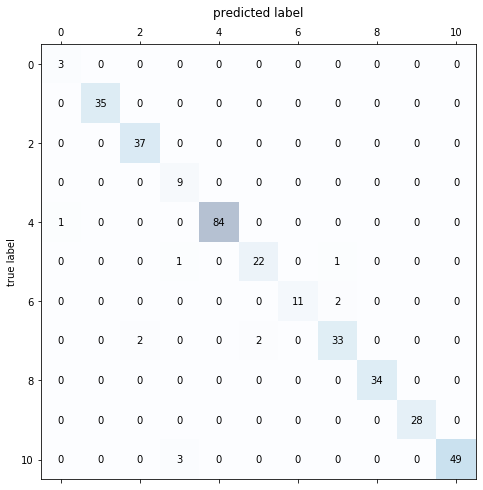

In [67]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.title('predicted label')        
plt.ylabel('true label')

In [68]:
print(metrics.confusion_matrix(all_label_update,int_predicted))

[[ 3  0  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0]
 [ 1  0  0  0 84  0  0  0  0  0  0]
 [ 0  0  0  1  0 22  0  1  0  0  0]
 [ 0  0  0  0  0  0 11  2  0  0  0]
 [ 0  0  2  0  0  2  0 33  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  3  0  0  0  0  0  0 49]]


In [69]:
print(metrics.classification_report(all_label_update,int_predicted))  

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.69      1.00      0.82         9
           5       1.00      0.99      0.99        85
           6       0.92      0.92      0.92        24
           7       1.00      0.85      0.92        13
           9       0.92      0.89      0.90        37
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        28
          12       1.00      0.94      0.97        52

    accuracy                           0.97       357
   macro avg       0.93      0.96      0.94       357
weighted avg       0.97      0.97      0.97       357



In [70]:
cnt = 0
for i in range(len(all_label_update)):
    idx = torch.argmax(predicted[i]).item()
    level = torch.max(predicted[i]).item()
    if all_label_update[i] != y_unique[idx]:
        cnt += 1
    print("Value: {:3d}, Predicted: {:3d}, Confidence: {:.3f}".format(all_label_update[i], y_unique[idx], level ))

Value:  11, Predicted:  11, Confidence: 0.987
Value:  11, Predicted:  11, Confidence: 0.979
Value:   3, Predicted:   3, Confidence: 0.994
Value:   5, Predicted:   5, Confidence: 0.997
Value:  12, Predicted:  12, Confidence: 0.996
Value:   3, Predicted:   3, Confidence: 0.990
Value:  10, Predicted:  10, Confidence: 0.965
Value:  10, Predicted:  10, Confidence: 0.995
Value:   9, Predicted:   9, Confidence: 0.999
Value:   5, Predicted:   5, Confidence: 0.989
Value:   3, Predicted:   3, Confidence: 0.997
Value:  10, Predicted:  10, Confidence: 0.996
Value:  10, Predicted:  10, Confidence: 0.996
Value:   2, Predicted:   2, Confidence: 0.486
Value:  10, Predicted:  10, Confidence: 0.973
Value:   7, Predicted:   7, Confidence: 0.619
Value:  12, Predicted:  12, Confidence: 0.997
Value:   3, Predicted:   3, Confidence: 0.998
Value:   5, Predicted:   5, Confidence: 0.996
Value:   2, Predicted:   2, Confidence: 0.947
Value:   9, Predicted:   9, Confidence: 0.985
Value:   5, Predicted:   5, Confid

In [71]:
cnt, len(all_label_update), cnt/len(all_label_update), (len(all_label_update)-cnt)/len(all_label_update)

(12, 357, 0.03361344537815126, 0.9663865546218487)

In [72]:
for i in range(len(all_label_update)):
    idx = torch.argmax(predicted[i]).item()
    level = torch.max(predicted[i]).item()
    if (all_label_update[i] != y_unique[idx]):
        print("Sick name: {:25s}, Value: {:3d}, Predicted: {:3d}, Confidence: {:.3f}".format(X_test[i], all_label_update[i], y_unique[idx], level ))

Sick name: 蘭 尾 炎 手 術                , Value:   6, Predicted:   4, Confidence: 0.448
Sick name: 左 側 膝 蓋 關 節 破 裂          , Value:  12, Predicted:   4, Confidence: 0.940
Sick name: 左 肝 內 結 石                , Value:   6, Predicted:   9, Confidence: 0.431
Sick name: 腎 水 腫                    , Value:   9, Predicted:   3, Confidence: 0.477
Sick name: 包 莖 合 併 包 皮 發 炎          , Value:   9, Predicted:   6, Confidence: 0.837
Sick name: 腎 水 腫                    , Value:   9, Predicted:   3, Confidence: 0.492
Sick name: 白 袍 症                    , Value:   5, Predicted:   1, Confidence: 0.059
Sick name: 左 手 肘 關 節 粉 碎 性          , Value:  12, Predicted:   4, Confidence: 0.880
Sick name: 左 手 肘 關 節 粉 碎 性          , Value:  12, Predicted:   4, Confidence: 0.830
Sick name: 包 皮 炎                    , Value:   9, Predicted:   6, Confidence: 0.625
Sick name:   輕 度 支 氣 管 過 敏          , Value:   7, Predicted:   9, Confidence: 0.492
Sick name: 支 氣 管 炎                  , Value:   7, Predicted:   9, Confidence

In [73]:
len(predicted)

357

In [74]:
pred_all_value = []
for pred in range(len(predicted)):
    value = []
    for val in predicted[pred]:
        value.append(round(val.item(), 4))
    pred_all_value.append(value)

In [77]:
max_value = []
for v in pred_all_value:
    max_value.append(max(v))

In [78]:
max_value.sort()
max_value

[0.059,
 0.3258,
 0.3358,
 0.3659,
 0.4312,
 0.4481,
 0.4585,
 0.4773,
 0.4863,
 0.492,
 0.4921,
 0.502,
 0.5353,
 0.5554,
 0.5811,
 0.582,
 0.5836,
 0.5982,
 0.6189,
 0.6233,
 0.6248,
 0.6481,
 0.698,
 0.7058,
 0.7123,
 0.7168,
 0.7262,
 0.7404,
 0.7512,
 0.7513,
 0.7538,
 0.7705,
 0.7772,
 0.7821,
 0.7876,
 0.799,
 0.8011,
 0.8296,
 0.8366,
 0.8469,
 0.8505,
 0.8512,
 0.8537,
 0.8567,
 0.858,
 0.867,
 0.8692,
 0.8697,
 0.8712,
 0.8725,
 0.8781,
 0.8801,
 0.8833,
 0.8839,
 0.8867,
 0.8871,
 0.8954,
 0.9027,
 0.9072,
 0.9129,
 0.9132,
 0.9133,
 0.9134,
 0.916,
 0.9162,
 0.918,
 0.9203,
 0.9206,
 0.9225,
 0.923,
 0.9241,
 0.9296,
 0.9297,
 0.9301,
 0.9316,
 0.932,
 0.9353,
 0.9366,
 0.937,
 0.9371,
 0.9373,
 0.9382,
 0.9396,
 0.9399,
 0.9402,
 0.9445,
 0.9445,
 0.9452,
 0.9461,
 0.9467,
 0.9468,
 0.9475,
 0.9484,
 0.9485,
 0.9503,
 0.9505,
 0.9512,
 0.9532,
 0.9534,
 0.9536,
 0.9552,
 0.9553,
 0.9557,
 0.956,
 0.9578,
 0.9583,
 0.9622,
 0.9628,
 0.9631,
 0.9654,
 0.9655,
 0.9662,
 0.966

In [81]:
cnt = 0
for v in pred_all_value:
    if max(v) < 0.6:
        idx = torch.argmax(predicted[cnt]).item()
        level = torch.max(predicted[cnt]).item()
        print("Sick name: {:25s}, Value: {:3d}, Predicted: {:3d}, Confidence: {:.3f}".format(X_test[cnt], all_label_update[cnt], y_unique[idx], level))
        print(v)
        print()
    cnt += 1

Sick name: 血 糖 偏 高                  , Value:   2, Predicted:   2, Confidence: 0.486
[0.0509, 0.0045, 0.0003, 0.0048, 0.0224, 0.0178, 0.12, 0.4863, 0.0001, 0.0005, 0.0018]

Sick name: 間 質 性 膀 胱 炎              , Value:   9, Predicted:   9, Confidence: 0.598
[0.0005, 0.0028, 0.0017, 0.0501, 0.5982, 0.0194, 0.0013, 0.0002, 0.0844, 0.0006, 0.0018]

Sick name: 蘭 尾 炎 手 術                , Value:   6, Predicted:   4, Confidence: 0.448
[0.0014, 0.0793, 0.0008, 0.4481, 0.0086, 0.0026, 0.0007, 0.0013, 0.0331, 0.0172, 0.0025]

Sick name: 闌 尾 炎                    , Value:   6, Predicted:   6, Confidence: 0.535
[0.0021, 0.1369, 0.0014, 0.1357, 0.0165, 0.0016, 0.0011, 0.0012, 0.5353, 0.0003, 0.0029]

Sick name: 血 糖 偏 高                  , Value:   2, Predicted:   2, Confidence: 0.584
[0.0336, 0.0132, 0.0003, 0.0063, 0.0054, 0.0195, 0.1057, 0.5836, 0.0001, 0.0005, 0.0025]

Sick name: 左 肝 內 結 石                , Value:   6, Predicted:   9, Confidence: 0.431
[0.0142, 0.1002, 0.0014, 0.051, 0.4312, 0.0006, 